In [66]:
import numpy as np
import datetime as dt

from rbamlib.web import omni
from rbamlib.utils import storm_idx, fixfill
from rbamlib.models.mag import TS2005_S, TS2005_W
import matplotlib.pyplot as plt

In [67]:
# 1) Define a date range:
start_date = dt.datetime(2013, 10, 8)
end_date   = dt.datetime(2013, 10, 11)  # 24 hrs later

# 2) Retrieve Dst via OMNI data loader:
time, Dst = omni(start_date, end_date, ['Symh'], resolution='5min')
#time, Dst

[Text(0.5, 1.0, ''), Text(0.5, 0, 'Time'), Text(0, 0.5, 'Dst [nT]')]

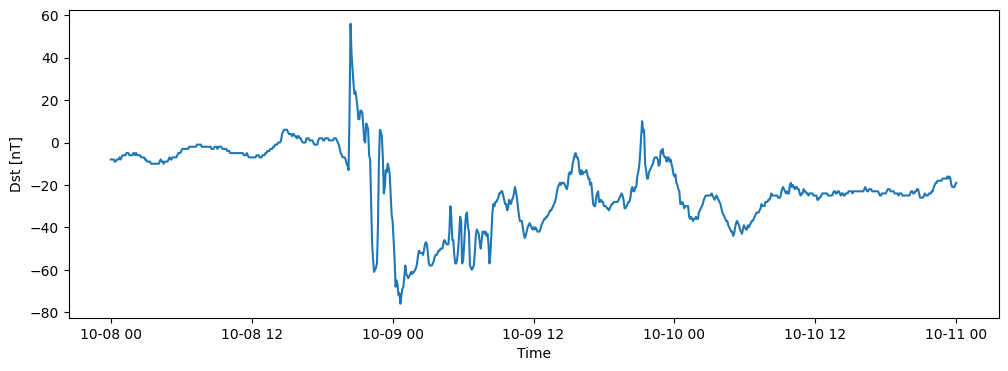

In [69]:
# 4) Plot the results in matplotlib
fig, ax = plt.subplots(figsize=(12, 4))  # single Axes on a Figure
ax.plot(time, Dst, label="Dst")
ax.set(title="", xlabel="Time",ylabel="Dst [nT]")

In [70]:
# 2a) Retrieve other parameters:
time, By, Bz, Pdyn, Nsw, Vsw = omni(start_date, end_date, ['By_GSE', 'Bz_GSE', 'Flow_P', 'N_p', 'Flow_Speed'], resolution='5min')

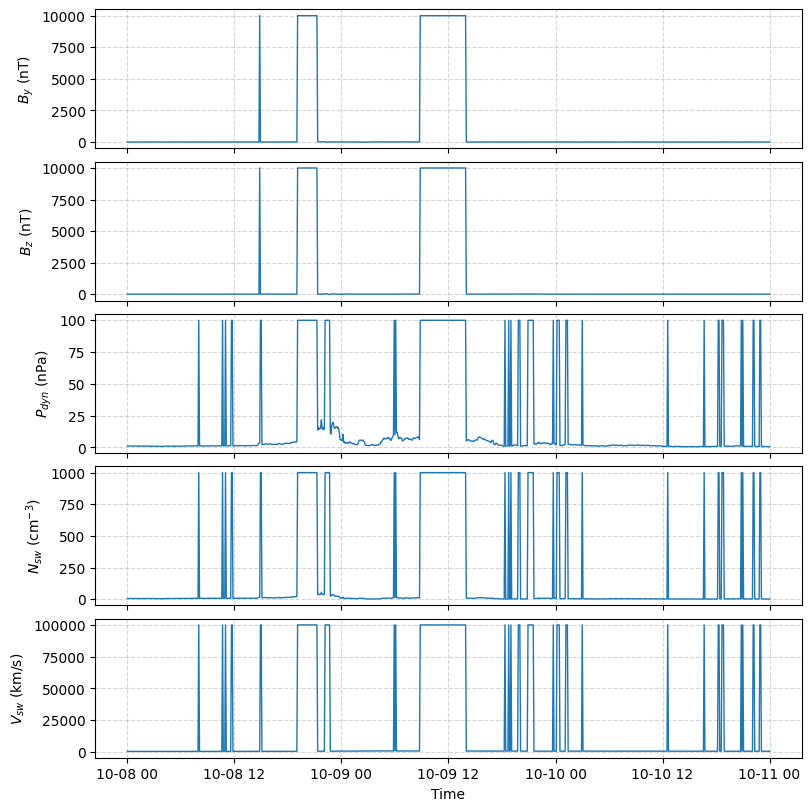

In [71]:
# Parameter list and labels
params = [By, Bz, Pdyn, Nsw, Vsw]
titles = [r'$B_y$ (nT)', r'$B_z$ (nT)', r'$P_{dyn}$ (nPa)', r'$N_{sw}$ (cm$^{-3}$)', r'$V_{sw}$ (km/s)']

# Create figure and subplots
fig, axs = plt.subplots(5, 1, figsize=(8, 8), sharex=True, constrained_layout=True)

# Plot each parameter
for ax, param, title in zip(axs, params, titles):
    ax.plot(time, param, lw=1)
    ax.set_ylabel(title, fontsize=10)
    ax.grid(True, linestyle="--", alpha=0.5)

# Only the last subplot gets an x-axis label
axs[-1].set_xlabel("Time", fontsize=10)

plt.show()

In [72]:
# Fixing the indexes
By = fixfill(time, By, fillval = 9999.99, method='interp')
Bz = fixfill(time, Bz, fillval = 9999.99, method='interp')
Pdyn = fixfill(time, Pdyn, fillval = 99.99, method='interp')
Nsw = fixfill(time, Nsw, fillval = 999.99, method='interp')
Vsw = fixfill(time, Vsw, fillval = 99999.9, method='interp')

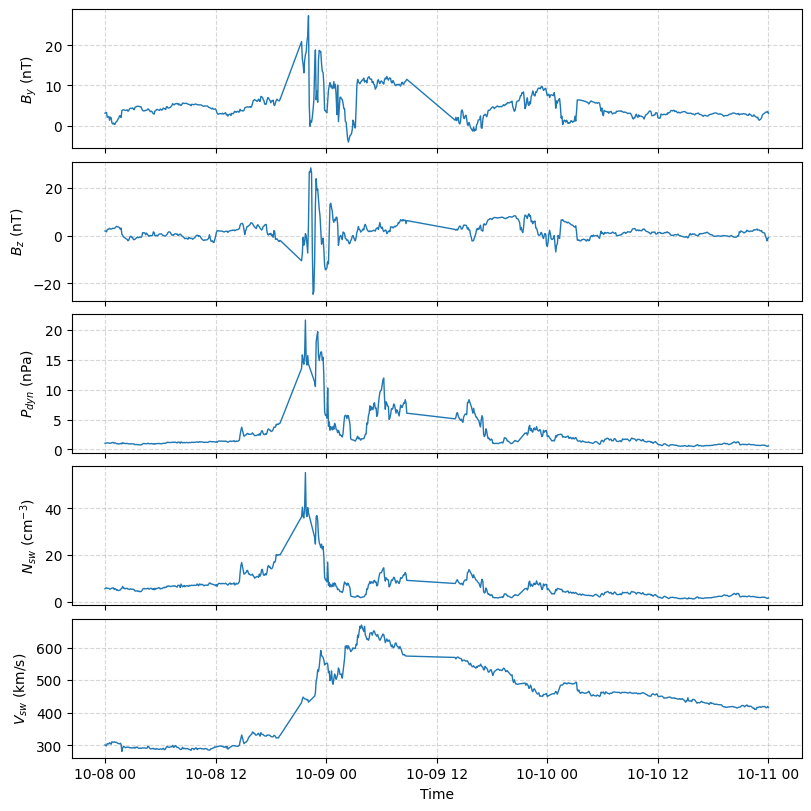

In [73]:
params = [By, Bz, Pdyn, Nsw, Vsw]

# Create figure and subplots
fig, axs = plt.subplots(5, 1, figsize=(8, 8), sharex=True, constrained_layout=True)

# Plot each parameter
for ax, param, title in zip(axs, params, titles):
    ax.plot(time, param, lw=1)
    ax.set_ylabel(title, fontsize=10)
    ax.grid(True, linestyle="--", alpha=0.5)

# Only the last subplot gets an x-axis label
axs[-1].set_xlabel("Time", fontsize=10)

plt.show()

In [74]:
# 3) Identify storms (indices where Dst < -40)
storms = storm_idx(time, Dst, threshold=-40.0, gap_hours=1.0)
print(f"{len(storms)} Storm onsets:", storms) 

3 Storm onsets: [np.int64(263), np.int64(277), np.int64(545)]


In [77]:
# 4) Compute source functions S => shape (N, 6)
S = TS2005_S(Nsw, Vsw, Bz, fillval=0.)

# 5) Compute W, resetting at each storm
W = TS2005_W(time, S, storm_onsets=storms, fill_value=0.)
# W = TS2005_W(time, S)
print("W shape:", W.shape) 

# Check some values
for i in range(6):
    print(f"W{i}, range: {np.nanmin(W[:,i]):.3f} to {np.nanmax(W[:,i]):.3f}, mean: {np.nanmean(W[:,i]):.3f}")

W shape: (865, 6)
W0, range: 0.000 to 0.864, mean: 0.007
W1, range: 0.000 to 1.238, mean: 0.010
W2, range: 0.000 to 0.148, mean: 0.001
W3, range: 0.000 to 2.268, mean: 0.016
W4, range: 0.000 to 2.036, mean: 0.016
W5, range: 0.000 to 7.505, mean: 0.064


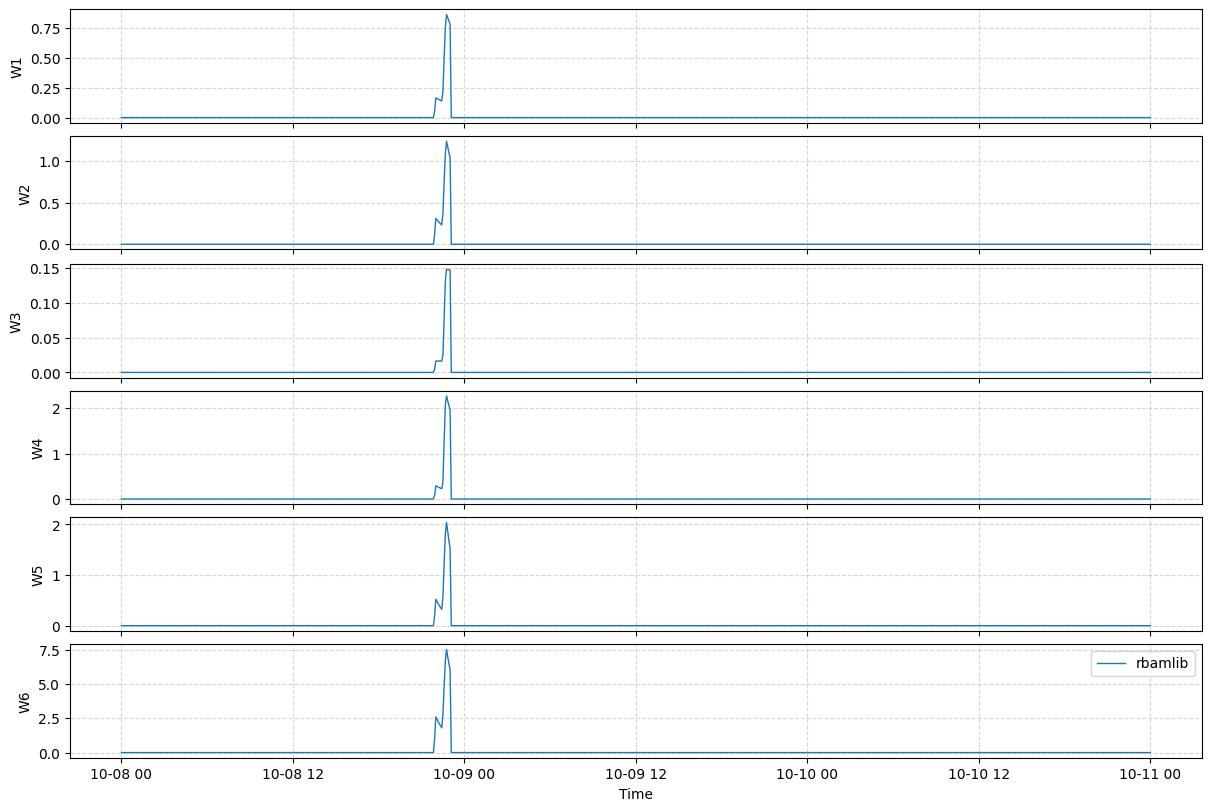

In [78]:
# Create figure and subplots
fig, axs = plt.subplots(6, 1, figsize=(12, 8), sharex=True, constrained_layout=True)
titles=['W1', 'W2', 'W3', 'W4', 'W5', 'W6']
# Plot each parameter
for i, (ax, title) in enumerate(zip(axs, titles)):
    ax.plot(time, W[:,i], lw=1, label='rbamlib')
    ax.set_ylabel(title, fontsize=10)
    ax.grid(True, linestyle="--", alpha=0.5)

ax.legend()
# Only the last subplot gets an x-axis label
ax.set_xlabel("Time", fontsize=10)

plt.show()